In [192]:
import torch
import numpy as np

In [193]:
w = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# Input
x = torch.tensor([3.0])

In [194]:
#Forward pass
y_pred = w * x + b
print(f"y_pred: {y_pred.item()}")

y_pred: 7.0


In [195]:
#Loss
y_true = torch.tensor([10.0])
loss = (y_pred - y_true) ** 2
print(f"Loss: {loss.item()}")

Loss: 9.0


In [196]:
print(f"Avant backward: w.grad = {w.grad}")

Avant backward: w.grad = None


In [197]:
loss.backward()

In [198]:
print(f"Après backward: w.grad = {w.grad}")
print(f"Après backward: b.grad = {b.grad}")

Après backward: w.grad = tensor([-18.])
Après backward: b.grad = tensor([-6.])


In [199]:
# Update manuel des poids
learning_rate = 0.01
with torch.no_grad():  #Désactiver le tracking des gradients pour l'update w = w + alpha * w
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

In [200]:
print(f"Nouveaux poids: w = {w}, b = {b}")

Nouveaux poids: w = tensor([2.1800], requires_grad=True), b = tensor([1.0600], requires_grad=True)


In [201]:
#Réinitialiser les gradients (IMPORTANT !)
w.grad.zero_()
b.grad.zero_()
print(f"Après zero_: w.grad = {w.grad}, b.grad = {b.grad}")

Après zero_: w.grad = tensor([0.]), b.grad = tensor([0.])


In [202]:
import torch.nn as nn 

perceptron = nn.Linear(1, 1)

#Voir les poids initiaux
print(f"Poids: {perceptron.weight}")
print(f"Biais: {perceptron.bias}")

Poids: Parameter containing:
tensor([[0.1266]], requires_grad=True)
Biais: Parameter containing:
tensor([-0.2159], requires_grad=True)


In [203]:
# Forward
x = torch.tensor([[3.0]]) # Shape (batch_size, features)
print(f"input: {x}")
y_pred = perceptron(x)
print(y_pred)

input: tensor([[3.]])
tensor([[0.1640]], grad_fn=<AddmmBackward0>)


In [204]:
# Loss
y_true = torch.tensor([[10.0]])
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)

In [205]:
loss

tensor(96.7461, grad_fn=<MseLossBackward0>)

In [206]:
#Backward
loss.backward()

In [207]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: tensor([[-59.0157]])
Gradient du biais: tensor([-19.6719])


In [208]:
import torch.optim as optim
optimizer = optim.SGD(perceptron.parameters(), lr=0.01)

In [209]:
optimizer.step()

In [210]:
print(f"Nouveaux poids: {perceptron.weight} {perceptron.bias}")

Nouveaux poids: Parameter containing:
tensor([[0.7168]], requires_grad=True) Parameter containing:
tensor([-0.0192], requires_grad=True)


In [211]:
optimizer.zero_grad()

In [212]:
print(f"Gradient du poids: {perceptron.weight.grad}")
print(f"Gradient du biais: {perceptron.bias.grad}")

Gradient du poids: None
Gradient du biais: None


In [213]:
class SimpleNet(nn.Module) : 
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU()
    
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))

        x = x.view(-1, 128 * 4 * 4)
        
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [214]:
model = SimpleNet()

In [215]:
model

SimpleNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [216]:
x = torch.randn(1, 3, 32, 32)
y = torch.tensor([5.0])
y_pred = model(x)

criterion = nn.CrossEntropyLoss()
loss = nn.MSELoss()(y_pred, y)

loss.backward()

c:\Users\m0m0x\OneDrive\Bureau\A4-CDI\ia\.venv\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [217]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Normalize
import matplotlib.pyplot as plt

In [218]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform
)

In [219]:
training_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, pin_memory=True, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False, pin_memory=True, num_workers=4)

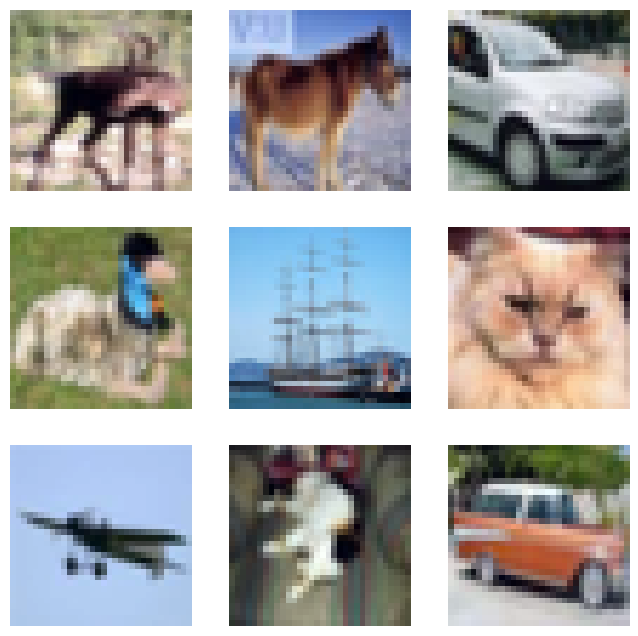

In [220]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    

    img_display = img.permute(1, 2, 0)
    
 
    img_display = (img_display - img_display.min()) / (img_display.max() - img_display.min())
    
    plt.imshow(img_display)
    
plt.show()

In [221]:
print(training_data.classes)
print(training_data.data.size)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
153600000


In [222]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(3*32*32, 512),
            nn.BatchNorm1d(512),        
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(512, 128),
            nn.BatchNorm1d(128),       
            nn.ReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        return logits

In [223]:
print(torch.__version__)

2.6.0.dev20241112+cu121


In [224]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using device: {device}")
model = SimpleNet().to(device)
print(model)

Using device: cuda
SimpleNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [225]:
model.eval()
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)

In [226]:
logits

tensor([[ 0.0239, -0.0243,  0.0137,  0.0081,  0.0167, -0.0514,  0.0324,  0.0790,
          0.0048,  0.0047]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [227]:
pred_probab = nn.Softmax(dim=1)(logits)
pred_probab

tensor([[0.1013, 0.0965, 0.1002, 0.0997, 0.1005, 0.0939, 0.1021, 0.1070, 0.0994,
         0.0993]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [228]:
y_pred = pred_probab.argmax(1)
y_pred

tensor([7], device='cuda:0')

In [229]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [230]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [231]:
def train(dataloader, model, loss_fn, optimizer, epoch_index, writer):
    size = len(dataloader.dataset)
    model.train()
    for batch_idx, batch_value in enumerate(dataloader):
        X, y = batch_value
        X, y = X.to(device), y.to(device)

        # Forward pass
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        global_step = epoch_index * len(dataloader) + batch_idx
        writer.add_scalar('Loss/train', loss.item(), global_step)

        if batch_idx % 100 == 0:
            loss, current = loss.item(), (batch_idx+1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5}]")


In [232]:
def test(dataloader, model, loss_fn, epoch_index, writer):
    size = len (dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss/=num_batches
    correct/=size

    writer.add_scalar('Accuracy/test', correct, epoch_index)
    writer.add_scalar('Loss/test', test_loss, epoch_index)
    
    print(f"Test Error: \n Accuaracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [233]:
# Assurez-vous que le modèle est bien sur le GPU avant de commencer
model.to(device)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    train(training_dataloader, model, loss_fn, optimizer, t, writer)
    test(test_dataloader, model, loss_fn, t, writer)
    
writer.flush()
writer.close()
print("Done!")

Epoch 1
---------------------
loss: 2.309533  [   64/50000]
loss: 1.601664  [ 6464/50000]
loss: 1.536309  [12864/50000]
loss: 1.140414  [19264/50000]
loss: 0.863793  [25664/50000]
loss: 0.911587  [32064/50000]
loss: 1.302119  [38464/50000]
loss: 0.990057  [44864/50000]
Test Error: 
 Accuaracy: 67.1%, Avg loss: 0.925639 

Epoch 2
---------------------
loss: 0.990498  [   64/50000]
loss: 0.888911  [ 6464/50000]
loss: 0.760122  [12864/50000]
loss: 0.827753  [19264/50000]
loss: 0.774462  [25664/50000]
loss: 0.687530  [32064/50000]
loss: 0.786889  [38464/50000]
loss: 0.634713  [44864/50000]
Test Error: 
 Accuaracy: 72.5%, Avg loss: 0.797194 

Epoch 3
---------------------
loss: 0.928197  [   64/50000]
loss: 1.003413  [ 6464/50000]
loss: 0.703057  [12864/50000]
loss: 1.007623  [19264/50000]
loss: 0.765087  [25664/50000]
loss: 0.771253  [32064/50000]
loss: 0.776540  [38464/50000]
loss: 0.563606  [44864/50000]
Test Error: 
 Accuaracy: 73.7%, Avg loss: 0.763316 

Epoch 4
---------------------
l

In [ ]:
model.to("cpu")
model.eval()

dummy_input = torch.randn(1, 3, 32, 32)

torch.onnx.export(
    model, 
    (dummy_input,), 
    "model.onnx", 
    input_names=['input'],       
    output_names=['output'],    
    dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
)

print("Modèle exporté : model_cifar.onnx")

Modèle exporté : model.onnx
